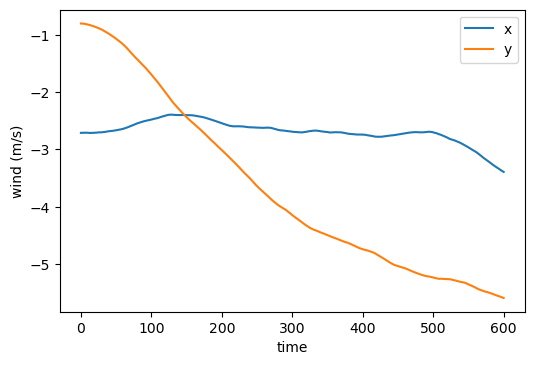

In [44]:
#Darya - final project for PHY407
#Baby flight simulator
# de-coupling horizontal and vertical motion


#---------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------
#you can set the constant wind value in x and y direction here 
#---------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------
cst_x_comp_wind = 0
cst_y_comp_wind = -2
#-------------------------------------------------------
#importing the needed function
import numpy
import random 
import matplotlib.pyplot as plt
#-------------------------------------------------------
# initial state
#runwal location at [-1000,500]
position_0 = [-500,0,0] #start at the middle of the runway 
velocity_0 = [30,0,0] #initial velocity only in x-direction
acceleration_0 = [0,0,0]  # we are not usig this for this project 


# I was wodering to add force and acceleration component but this
#would be beyond my time and the scope of this project
time_0 = 0
t_end = 10*60
timeStepSize = 0.01
#---------------------------------------------------------------
#wind condition 
#making a constant wind
cstwind = False #make switch from constant to gusty wind
wind = [cst_x_comp_wind,cst_y_comp_wind,0]


#making gust with gauss function
windxRecord = []
windyRecord = []
windtRecord = []

if(not cstwind):
    
    wind_x_inital = random.gauss(0,2)
    wind_y_inital = random.gauss(0,2)

    wind = numpy.array([wind_x_inital, wind_y_inital, 0])
    windRateOfChange = numpy.array([0.0, 0.0, 0.0])

time = time_0
while time < t_end:
    if(not cstwind ):
        # wind adjustments
        changeOfWindAcceleration = numpy.array([random.gauss(0, 0.005), random.gauss(0, 0.005), 0]) * timeStepSize
        windRateOfChange += changeOfWindAcceleration
        wind += windRateOfChange * timeStepSize
    
        randomWindPerturbation = numpy.array([random.gauss(0, 0.005), random.gauss(0, 0.005), 0]) * timeStepSize
        wind += randomWindPerturbation
    
    windxRecord.append(wind[0])
    windyRecord.append(wind[1])
    windtRecord.append(time)
    
    time += timeStepSize
    
    
# check how the winds work    
plt.figure(dpi=100)
plt.plot(windtRecord, windxRecord, label="x")
plt.plot(windtRecord, windyRecord, label="y")
plt.xlabel("time")
plt.ylabel("wind (m/s)")
plt.legend()
plt.show()

running main simulation
turn 1
turn 2
turn 3
turn 4 onto final
touch and go
takeoff
turn 1
turn 2
running non-crabbing
turn 1
turn 2
turn 3
turn 4 onto final
touch and go
takeoff
turn 1
turn 2
turn 3
running reference simulation
turn 1
turn 2
turn 3
turn 4 onto final
touch and go
takeoff
turn 1
turn 2


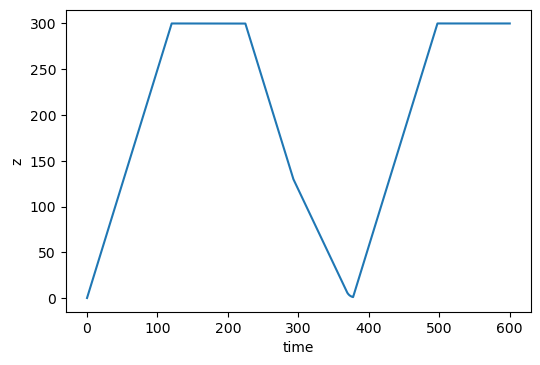

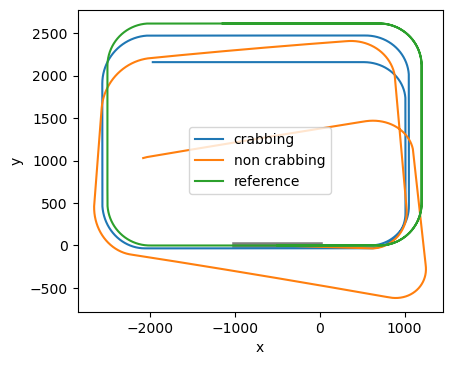

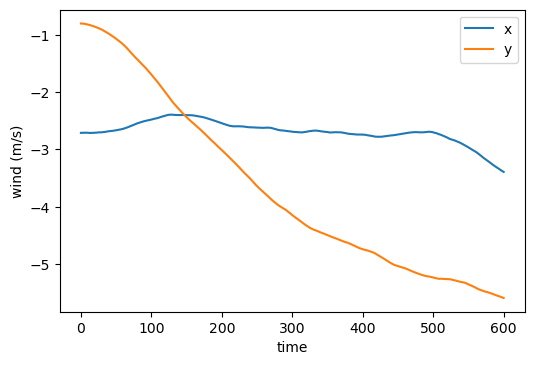

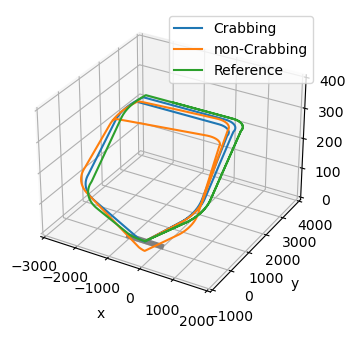

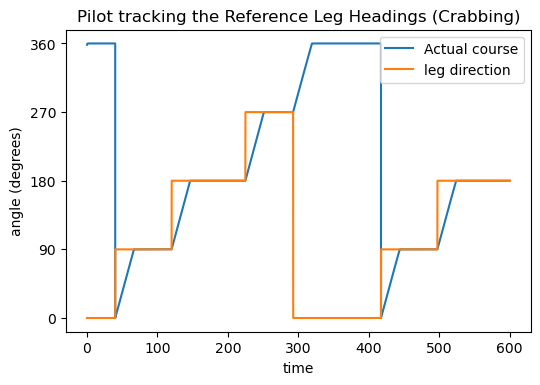

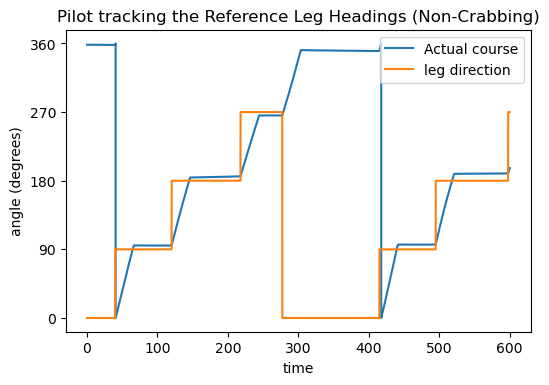

In [45]:
#define fuctions for our system
#-------------------------------------------------
#rotation function
def rotateAboutVertical(vector, theta):
    Matrix = numpy.matrix([
            [numpy.cos(theta), -numpy.sin(theta), 0],
            [numpy.sin(theta), numpy.cos(theta), 0],
            [0,0,1]
            ]) # rotation matrix about z direction
    answer = vector * Matrix
    answer = numpy.squeeze(numpy.asarray(answer))
    return answer

#conversion
def rotateAtRate(vector, rate):
    return rotateAboutVertical(vector, rate * timeStepSize)


#normalizing the heading for a number between 0 to 360
def normalizeHeading(heading):
    answer = heading
    while answer < 0:
        answer += numpy.radians(360)
    while answer > 360:
        answer -= numpy.radians(360)
    return answer

#sing arc tan to find the degree of heading
def headingOfVector(vector):
    return normalizeHeading(numpy.arctan2(vector[1], vector[0]))

#pick the smaller change 
def safeHeadingDifference(a, b):
    #  1: direct difference
    c1 = a - b
    
    #  2: across 0 degrees
    c2 = a + (numpy.radians(360)-b)
    
    if(abs(c1) < abs(c2)):
        return c1
    else:
        return c2



#pilot behaviour 

leg = "takeoff" #we will start each time from take off configuration
# possible values: upwind, crosswind, downwind, base

Runway_Heading = numpy.radians(0) 
runwayLength = 1000 #typical runway length

#turnFactor = numpy.radians(3)/numpy.radians(10)
# radins per second of turn rate per radian error
#maximumTurnRate = numpy.radians(3) # typical value for cessna 172

turnRadius = 500 # metres
turnSofteningAngle = numpy.radians(1) 
# if magnitude of heading error is less than this,
#proportionally soften the turn until a turn rate of 0 at o error.

# final approach
finalHeadingFactor = numpy.radians(30)/1000 # radians per second of turn rate per metre error
maximumFinalHeading = numpy.radians(30) # radians away from the runway heading

targetHeadingTable = {
        "takeoff": normalizeHeading(numpy.radians(0) + Runway_Heading),
        "downwind": normalizeHeading(numpy.radians(180) + Runway_Heading),
        "crosswind": normalizeHeading(numpy.radians(90) + Runway_Heading),
        "base": normalizeHeading(numpy.radians(270) + Runway_Heading),
        "final": normalizeHeading(numpy.radians(0) + Runway_Heading),
        "taxi": normalizeHeading(numpy.radians(0) + Runway_Heading)
        } # the target heading for each stage; 0 is the heading of the positive x direction aligned with runway

# This function controls what leg the pilot is flying
#more detail provided in the report about why these specific conditions imposed! :)
def legTransitions(position, velocity, time):
    global leg
    if(leg == "takeoff"):
        #if(position[0] > 2.5 * runwayLength ):
        if(position[2] > 100):
            print("turn 1")
            leg = "crosswind"
    if(leg == "crosswind"):
        #if(position[1] > 1.5 * runwayLength ):
        if(position[2] > 300):
            print("turn 2")
            leg = "downwind"
    if(leg == "downwind"):
        if(position[0] < -2 * runwayLength ):
            print("turn 3")
            leg = "base"
    if(leg == "base"):
        #if(position[1] < 1940*v_0 ):#.runwayLength ): #estimation for this case
        if(position[1] < turnRadius):
            print("turn 4 onto final")
            leg = "final"
    if(leg == "final"):
        if(position[2] < 1): # consider the aircraft to be on the ground when altitude is less than 1
            print("touch and go")
            leg = "taxi"
    if(leg == "taxi"):
        if(position[0] > -0.5*runwayLength):
            print("takeoff")
            leg = "takeoff"

def finalApproachHeading(position):
    distanceFromCentreline = position[1] # Because the runway runs in the +x direction, the y coordinate of position is the distance from the centreline.
    answer = finalHeadingFactor * distanceFromCentreline
    answer *= -1
    if(abs(answer > maximumFinalHeading)):
        return maximumFinalHeading * (answer/abs(answer))
    else:
        return answer

# Find the turn rate, in radians per second, required to turn at a given radius considering the current velocity.
# The result is always positive.
def rotationRateForRadius(velocity, radius):
    speed = numpy.linalg.norm(velocity) # find the magnitude of the velocity vector
    rate = speed / radius
    #print(rate)
    return rate

# pilot behaviour for rotation in the horizontal plane
def rotationRate(position, velocity, time):
    targetHeading = targetHeadingTable[leg]
    
    headingError = safeHeadingDifference(targetHeading, headingOfVector(velocity))
    
    if(headingError == 0):
        answer = 0
    else:
        answer = rotationRateForRadius(velocity, turnRadius) * (headingError/abs(headingError))
    
    if(abs(headingError) < turnSofteningAngle):
        answer *= abs(headingError) / turnSofteningAngle
    
    answer *= -1 # make left turns  (for this simulation)
    return answer
#considering all the circuit are left handed for this project

maximumVerticalSpeed = 2.5 # m/s
#avrage value for cessna 172


def verticalSpeedToHoldAltitude(altitude, targetAltitude):
    altitudeError = targetAltitude - altitude
    if(abs(altitudeError) > 7.6):
        return maximumVerticalSpeed * (altitudeError/abs(altitudeError))
    else:
        return maximumVerticalSpeed * (altitudeError/7.6)
#how vertical speed changes for different leg 
#Based on what we have in the report we impose some condition for turn 
#base don the vertical speed as what actually pilots doing 
def verticalSpeed(position, velocity, time):
    if(leg == "takeoff"):
        return maximumVerticalSpeed
    if(leg == "crosswind"):
        return maximumVerticalSpeed
    if(leg == "downwind"):
        return verticalSpeedToHoldAltitude(position[2], 300) # hold 300m during downwind
    if(leg == "base"):
        return verticalSpeedToHoldAltitude(position[2], 100) # descend to 100m during base
    if(leg == "final"):
        return 0.65*verticalSpeedToHoldAltitude(position[2], 0) # descend to 0 during final at lowered rate
    if(leg == "taxi"):
        return verticalSpeedToHoldAltitude(position[2], 0)
#now we are using the functions to generate the simulation for 3 different cases:
#crabbing
#non-crabbing
#reference
#---------------------------------------------------------------------------------------
# crabbing simulation 
print("running main simulation")

# state tracking variables
position = numpy.array(position_0)
airRelativeVelocity = numpy.array(velocity_0)

#velocity_ref =  numpy.array(velocity_0)


# recording
timeRecord = []
xRecord = []
yRecord = []
zRecord = []
headingRecord = []
targetHeadingRecord = []
headingErrorRecord = []


time = time_0


#---------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------
#crabbing case
component = 0
while time < t_end:
    wind = numpy.array([windxRecord[component], windyRecord[component], 0])
    groundRelativeVelocity = airRelativeVelocity + wind
    position = position + (groundRelativeVelocity * timeStepSize)
    
    # horizontal plane motion
    #airRelativeVelocity = rotateAtRate(airRelativeVelocity, rotationRate(position, airRelativeVelocity, time)) # The pilot navigates by pointing the aircraft along headings.
    #active crabbing!
    airRelativeVelocity = rotateAtRate(airRelativeVelocity, rotationRate(position, groundRelativeVelocity, time)) # If this is used, the pilot navigates using ground velocity and crabs.
    
    # vertical motion
    dz = verticalSpeed(position, airRelativeVelocity, time) * timeStepSize
    position[2] += dz
    
    # Record trajectory.
    xRecord.append(position[0])
    yRecord.append(position[1])
    zRecord.append(position[2])
    timeRecord.append(time)
    
    # Record related heading material
    headingRecord.append(headingOfVector(groundRelativeVelocity))
    targetHeadingRecord.append(targetHeadingTable[leg])
    headingErrorRecord.append(safeHeadingDifference(targetHeadingTable[leg], headingOfVector(groundRelativeVelocity)))
    
    # leg transition logic
    legTransitions(position, groundRelativeVelocity, time)
    
    # advance timestep
    time += timeStepSize
    component += 1

#---------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------
#non crabbing case constant 
timeRecordnc = []
xRecordnc = []
yRecordnc = []
zRecordnc = []

courseRecordnc = []
legCourseRecordnc = []

time = time_0

# reset state variables
position = numpy.array(position_0)
airRelativeVelocity = numpy.array(velocity_0)
time = time_0
leg = "takeoff"

# non-crabbing case
print("running non-crabbing")

component = 0
while time < t_end:
    wind = numpy.array([windxRecord[component], windyRecord[component],0])
    groundRelativeVelocity = airRelativeVelocity + wind
    position = position + (groundRelativeVelocity * timeStepSize)
    
    # horizontal plane motion
    airRelativeVelocity = rotateAtRate(airRelativeVelocity, rotationRate(position, airRelativeVelocity, time)) # The pilot navigates by pointing the aircraft along headings.
    #active crabbing!
    #airRelativeVelocity = rotateAtRate(airRelativeVelocity, rotationRate(position, groundRelativeVelocity, time)) # If this is used, the pilot navigates using ground velocity and crabs.
    
    # vertical motion
    dz = verticalSpeed(position, airRelativeVelocity, time) * timeStepSize
    position[2] += dz
    
    # Record trajectory.
    xRecordnc.append(position[0])
    yRecordnc.append(position[1])
    zRecordnc.append(position[2])
    timeRecordnc.append(time)
    
    # record heading things
    courseRecordnc.append(headingOfVector(groundRelativeVelocity))
    legCourseRecordnc.append(targetHeadingTable[leg])
    

    # leg transition logic
    legTransitions(position, groundRelativeVelocity, time)
    
    # advance timestep
    time += timeStepSize
    component += 1



##### reference #####
print("running reference simulation")

xReference = []
yReference = []
zReference = []
timeReference = []

# reset state variables
position = numpy.array(position_0)
airRelativeVelocity = numpy.array(velocity_0)
time = time_0
leg = "takeoff"


while time < t_end:
    #groundRelativeVelocity = airRelativeVelocity + wind
    groundRelativeVelocity = airRelativeVelocity # omit wind in the reference trajectory
    position = position + (groundRelativeVelocity * timeStepSize)
    airRelativeVelocity = rotateAtRate(airRelativeVelocity, rotationRate(position, airRelativeVelocity, time))
    
    # vertical motion
    dz = verticalSpeed(position, airRelativeVelocity, time) * timeStepSize
    position[2] += dz
    
    xReference.append(position[0])
    yReference.append(position[1])
    zReference.append(position[2])
    timeReference.append(time)
    

    
    legTransitions(position, groundRelativeVelocity, time)
    
    time += timeStepSize

#---------------------------------------------------------------------------------------

# plotting the needed graphs

#plt.figure(dpi=100)
#plt.plot(timeRecord, xRecord)
#plt.xlabel("time")
#plt.ylabel("x")
#plt.show()

#plt.figure(dpi=100)
#plt.plot(timeRecord, yRecord)
#plt.xlabel("time")
#plt.ylabel("y")
#plt.show()


# altitude over time
plt.figure(dpi=100)
plt.plot(timeRecord, zRecord)
plt.xlabel("time")
plt.ylabel("z")
plt.show()

plt.figure(dpi=100)
plt.plot([-runwayLength, 0], [0,0], c="gray", linewidth = 4) # runway
plt.plot(xRecord, yRecord, label="crabbing")
plt.plot(xRecordnc, yRecordnc, label="non crabbing")
plt.plot(xReference, yReference, label="reference")
plt.gca().set_aspect("equal")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()



plt.figure(dpi=100)
plt.plot(windtRecord, windxRecord, label="x")
plt.plot(windtRecord, windyRecord, label="y")
plt.xlabel("time")
plt.ylabel("wind (m/s)")
plt.legend()
plt.show()

"""
plt.figure(dpi=100)
plt.plot(windxRecord, windyRecord)
plt.xlabel("wind x")
plt.ylabel("wind y")
plt.show()
"""

plt.figure(dpi=100)
ax = plt.axes(projection = "3d")
ax.plot3D([-runwayLength, 0], [0,0], [0,0], c="gray", linewidth = 4) # runway
ax.plot3D(xRecord, yRecord, zRecord, label= "Crabbing")
ax.plot3D(xRecordnc, yRecordnc, zRecordnc, label="non-Crabbing")
ax.plot3D(xReference, yReference, zReference, label="Reference")
#ax.set_aspect("equal")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
#plt.zlabel("z")

ax.set_xlim(-3000, 2000)
ax.set_ylim(-1000, 4000)
ax.set_zlim(0, 400)
plt.show()

# course plot when crabbing
plt.figure(dpi=100)
plt.plot(timeRecord, numpy.degrees(headingRecord), label="Actual course")
plt.plot(timeRecord, numpy.degrees(targetHeadingRecord), label="leg direction")
#plt.plot(timeRecord, numpy.degrees(headingErrorRecord), label="Difference") #, linestyle="", marker=",")
plt.xlabel("time")
plt.ylabel("angle (degrees)")
plt.yticks(numpy.arange(0, 361, 90))
plt.title("Pilot tracking the Reference Leg Headings (Crabbing)")
plt.legend()
plt.show()

# course plot when not crabbing
plt.figure(dpi=100)
plt.plot(timeRecord, numpy.degrees(courseRecordnc), label="Actual course")
plt.plot(timeRecord, numpy.degrees(legCourseRecordnc), label="leg direction")
#plt.plot(timeRecord, numpy.degrees(headingErrorRecord), label="Difference") #, linestyle="", marker=",")
plt.xlabel("time")
plt.ylabel("angle (degrees)")
plt.yticks(numpy.arange(0, 361, 90))
plt.title("Pilot tracking the Reference Leg Headings (Non-Crabbing)")
plt.legend()
plt.show()

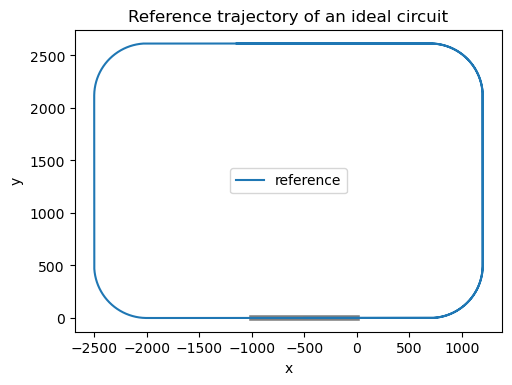

In [46]:
plt.figure(dpi=100)
plt.plot([-runwayLength, 0], [0,0], c="gray", linewidth = 4) # runway
plt.plot(xReference, yReference, label="reference")
plt.gca().set_aspect("equal")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Reference trajectory of an ideal circuit")
plt.legend()
plt.show()


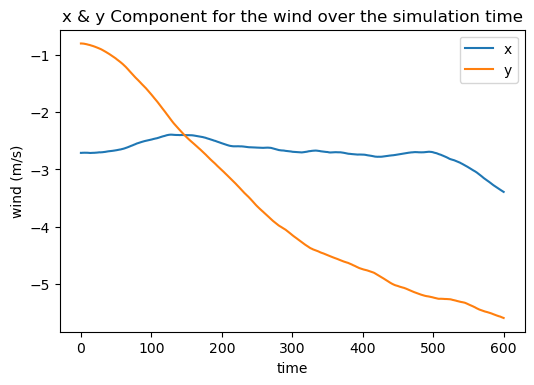

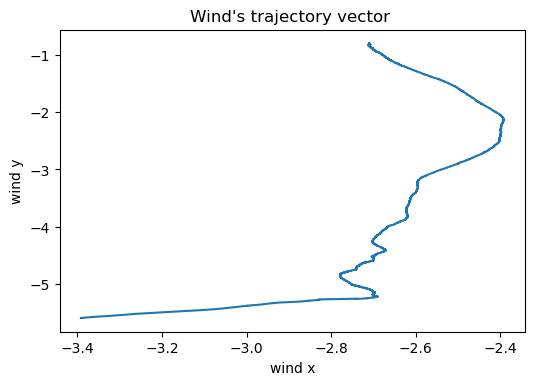

In [47]:
plt.figure(dpi=100)
plt.plot(windtRecord, windxRecord, label="x")
plt.plot(windtRecord, windyRecord, label="y")
plt.xlabel("time")
plt.ylabel("wind (m/s)")
plt.legend()
plt.title("x & y Component for the wind over the simulation time")
plt.show() 

plt.figure(dpi=100)
plt.plot(windxRecord, windyRecord)
plt.xlabel("wind x")
plt.ylabel("wind y")
plt.title("Wind's trajectory vector ")
plt.show()


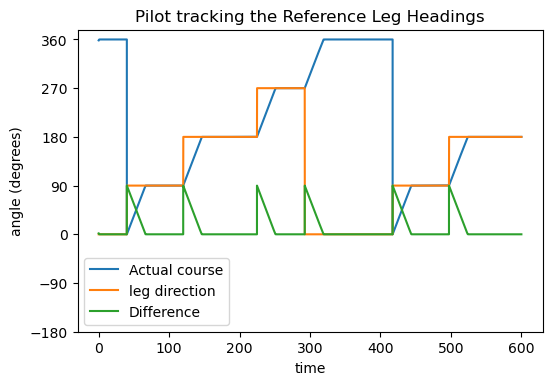

In [48]:
plt.figure(dpi=100)
plt.plot(timeRecord, numpy.degrees(headingRecord), label="Actual course")
plt.plot(timeRecord, numpy.degrees(targetHeadingRecord), label="leg direction")
plt.plot(timeRecord, numpy.degrees(headingErrorRecord), label="Difference") #, linestyle="", marker=",")
plt.xlabel("time")
plt.ylabel("angle (degrees)")
plt.yticks(numpy.arange(-180, 361, 90))
plt.title("Pilot tracking the Reference Leg Headings")
plt.legend()
plt.show()